<a href="https://colab.research.google.com/github/muinul-official/Data-Mining-G13/blob/hannah-feature-engineering/EDA_%26_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WIE3007 Data Mining Group Project
##EDA & Feature Engineering

* Name: Hannah bt Arham Rahimy
* Matrics Number : 22002434
* Role: Data Cleaning, Encoding, Feature Engineering, AI-based Feature Extraction



###1) Load Dataset

In [1]:
import pandas as pd
churn = pd.read_csv("ecommerce_churn_dataset.csv")
transactions = pd.read_csv("ecommerce_transactions.csv")
chats = pd.read_csv("ecommerce_chat_logs.csv")
reviews = pd.read_csv("ecommerce_reviews.csv")

print("churn:", churn.shape)
print("transactions:", transactions.shape)
print("chats:", chats.shape)
print("reviews:", reviews.shape)

churn.head()

churn: (1200, 30)
transactions: (6396, 8)
chats: (1200, 5)
reviews: (1200, 5)


,customer_id,age,gender,location,membership_tier,account_age_days,recency,frequency,monetary_value,avg_order_value,...,review_text,review_rating,review_sentiment_score,review_length,sentiment_score_avg,text_engagement_score,total_spent_per_day,order_frequency_per_month,churn,churn_probability
0,CUST000001,58,Male,Urban,Gold,480,0,2,88.15,44.08,...,Average purchase. No major issues.,3,0.520,34,0.533,0.445,0.183264,0.117647,0,0.330
1,CUST000002,18,Male,Rural,Platinum,382,0,2,245.31,122.66,...,It's fine. Nothing exceptional.,3,0.594,31,0.499,0.440,0.640496,0.145631,0,0.436
2,CUST000003,73,Female,Rural,Silver,9,9,1,18.85,18.85,...,The worst purchase I've made. Don't buy this p...,2,0.055,53,0.055,0.610,1.885000,0.769231,0,0.489
3,CUST000004,61,Other,Urban,Silver,184,0,6,126.75,21.12,...,Product doesn't work as advertised. Very frust...,2,0.110,53,0.099,0.635,0.685135,0.841121,1,0.577
4,CUST000005,28,Other,Suburban,Bronze,336,0,3,67.16,22.39,...,Wonderful product. Fast delivery. Highly recom...,4,0.714,51,0.796,0.585,0.199288,0.245902,0,0.158


###2) EDA

In [2]:
churn.columns

Index(['customer_id', 'age', 'gender', 'location', 'membership_tier',
       'account_age_days', 'recency', 'frequency', 'monetary_value',
       'avg_order_value', 'total_orders', 'days_since_last_login',
       'cart_abandonment_rate', 'email_open_rate', 'support_tickets',
       'frustration_index', 'chat_log', 'chat_sentiment_score', 'chat_length',
       'has_negative_keywords', 'review_text', 'review_rating',
       'review_sentiment_score', 'review_length', 'sentiment_score_avg',
       'text_engagement_score', 'total_spent_per_day',
       'order_frequency_per_month', 'churn', 'churn_probability'],
      dtype='object')

In [3]:
churn.head()

,customer_id,age,gender,location,membership_tier,account_age_days,recency,frequency,monetary_value,avg_order_value,...,review_text,review_rating,review_sentiment_score,review_length,sentiment_score_avg,text_engagement_score,total_spent_per_day,order_frequency_per_month,churn,churn_probability
0,CUST000001,58,Male,Urban,Gold,480,0,2,88.15,44.08,...,Average purchase. No major issues.,3,0.520,34,0.533,0.445,0.183264,0.117647,0,0.330
1,CUST000002,18,Male,Rural,Platinum,382,0,2,245.31,122.66,...,It's fine. Nothing exceptional.,3,0.594,31,0.499,0.440,0.640496,0.145631,0,0.436
2,CUST000003,73,Female,Rural,Silver,9,9,1,18.85,18.85,...,The worst purchase I've made. Don't buy this p...,2,0.055,53,0.055,0.610,1.885000,0.769231,0,0.489
3,CUST000004,61,Other,Urban,Silver,184,0,6,126.75,21.12,...,Product doesn't work as advertised. Very frust...,2,0.110,53,0.099,0.635,0.685135,0.841121,1,0.577
4,CUST000005,28,Other,Suburban,Bronze,336,0,3,67.16,22.39,...,Wonderful product. Fast delivery. Highly recom...,4,0.714,51,0.796,0.585,0.199288,0.245902,0,0.158


In [4]:
#target variable understanding
churn['churn'].value_counts()

,count
churn,
0,925
1,275


In [5]:
#check if customer_id exists in all datasets
transactions.columns

Index(['customer_id', 'transaction_date', 'amount', 'product_category',
       'quantity', 'discount_applied', 'payment_method', 'shipping_method'],
      dtype='object')

In [6]:
chats.columns

Index(['customer_id', 'chat_log', 'chat_sentiment_score', 'chat_length',
       'has_negative_keywords'],
      dtype='object')

In [7]:
reviews.columns

Index(['customer_id', 'review_text', 'review_rating', 'review_sentiment_score',
       'review_length'],
      dtype='object')

In [8]:
#check dataset shape & missing values
transactions.shape, transactions.isnull().sum()

((6396, 8),
 customer_id         0
 transaction_date    0
 amount              0
 product_category    0
 quantity            0
 discount_applied    0
 payment_method      0
 shipping_method     0
 dtype: int64)

In [9]:
chats.shape, chats.isnull().sum()

((1200, 5),
 customer_id              0
 chat_log                 0
 chat_sentiment_score     0
 chat_length              0
 has_negative_keywords    0
 dtype: int64)

In [10]:
reviews.shape, reviews.isnull().sum()

((1200, 5),
 customer_id               0
 review_text               0
 review_rating             0
 review_sentiment_score    0
 review_length             0
 dtype: int64)

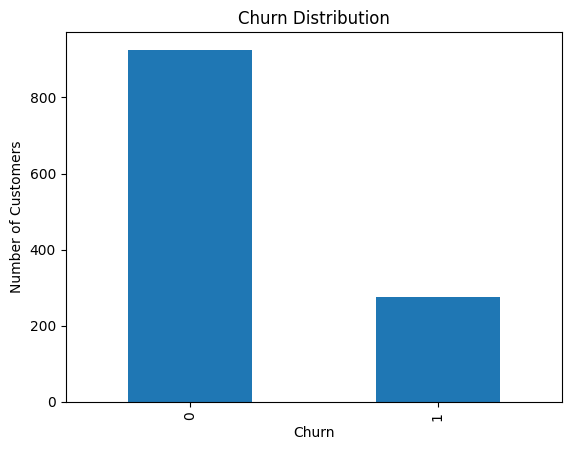

In [11]:
# churn distribution

import matplotlib.pyplot as plt

churn['churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

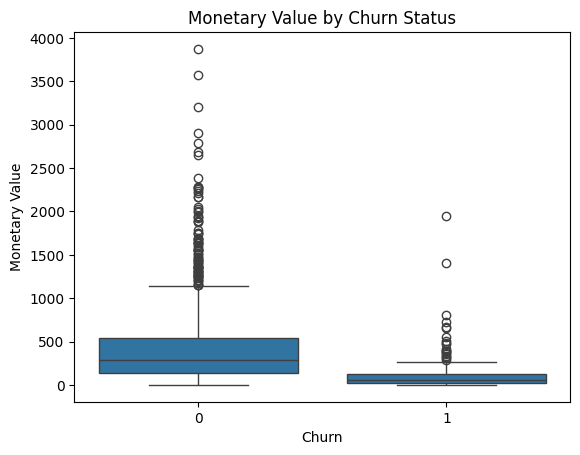

In [12]:
# spending vs churn

import seaborn as sns

sns.boxplot(x='churn', y ='monetary_value', data=churn)
plt.title("Monetary Value by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monetary Value")
plt.show()

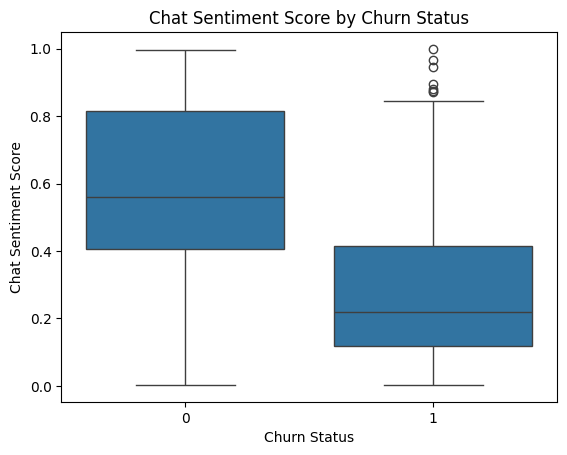

In [13]:
# chat sentiment score vs churn

sns.boxplot(x='churn', y='chat_sentiment_score', data=churn)
plt.title("Chat Sentiment Score by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Chat Sentiment Score")
plt.show()

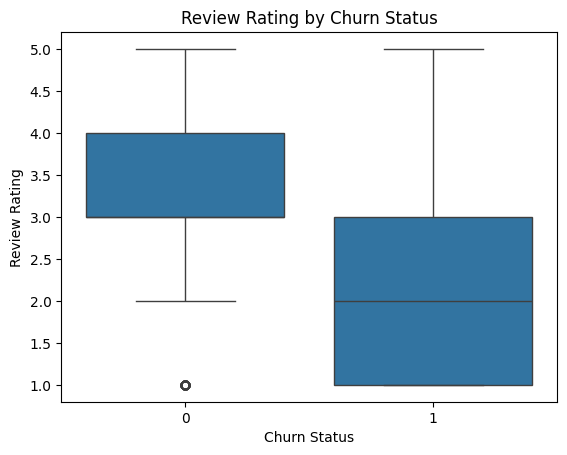

In [14]:
# review rating vs churn

sns.boxplot(x='churn', y ='review_rating', data=churn)
plt.title("Review Rating by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Review Rating")
plt.show()

#### EDA Summary

The main churn dataset contains 1,200 customer-level records with a binary churn target, where 925 customers are non-churned and 275 are churned, indicating moderate class imbalance.

Supporting datasets include transaction history (6396 records), customer support chat logs (1200), and product reviews (1200). Transaction data is recorded at transaction level, while chat and review datasets are already aggregated at customer level.

All datasets share a common `customer_id`, enabling integration across data sources. Initial inspection shows no missing values in key variables, indicating good data quality for feature engineering and modeling.


###4) Data Cleaning & Preprocessing

In [ ]:
# correcting data types
transactions['amount'] = pd.to_numeric(transactions['amount'], errors='coerce')

In [ ]:
# check duplicate
transactions.duplicated().sum()

np.int64(0)

In [ ]:
chats.duplicated().sum()

np.int64(0)

In [ ]:
reviews.duplicated().sum()

np.int64(0)

In [ ]:
transactions.describe()

,amount,quantity
count,6396.000000,6396.000000
mean,69.715044,3.020951
std,131.189101,1.417924
min,0.400000,1.000000
25%,14.812500,2.000000
50%,33.320000,3.000000
75%,74.935000,4.000000
max,3683.010000,5.000000


####Data Cleaning & Preprocessing Summary :

Basic preprocessing was applied, including data type correction, duplicate checks,
and sanity inspection of numerical values. No duplicate records were identified, and transaction
amounts were confirmed to be within reasonable ranges. The datasets were found to be clean and
suitable for feature engineering.


###5) Feature Engineering

####5.1 ) Transactions dataset

In [ ]:
#create total_transactions, total_spent, avg_transaction_value, max_transaction_value
transaction_features = transactions.groupby('customer_id').agg(
    total_transactions=('amount', 'count'),
    total_spent=('amount', 'sum'),
    avg_transaction_value=('amount', 'mean'),
    max_transaction_value=('amount', 'max')
).reset_index()

transaction_features.head()

,customer_id,total_transactions,total_spent,avg_transaction_value,max_transaction_value
0,CUST000001,2,88.15,44.075000,60.10
1,CUST000002,2,245.31,122.655000,220.31
2,CUST000003,1,18.85,18.850000,18.85
3,CUST000004,6,126.75,21.125000,48.28
4,CUST000005,3,67.16,22.386667,35.91


####5.2 : Chats dataset

In [ ]:
#create num_support_chats, avg_chat_sentiment,min_chat_sentiment,min_chat_sentiment
chat_features = chats.groupby('customer_id').agg(
    num_support_chats=('chat_sentiment_score', 'count'),
    avg_chat_sentiment=('chat_sentiment_score', 'mean'),
    min_chat_sentiment=('chat_sentiment_score', 'min'),
    avg_chat_length=('chat_length', 'mean')
).reset_index()

chat_features.head()

,customer_id,num_support_chats,avg_chat_sentiment,min_chat_sentiment,avg_chat_length
0,CUST000001,1,0.546,0.546,55.0
1,CUST000002,1,0.404,0.404,57.0
2,CUST000003,1,0.055,0.055,69.0
3,CUST000004,1,0.088,0.088,74.0
4,CUST000005,1,0.878,0.878,66.0


####5.3 : Reviews dataset (base features)

In [ ]:
#create num_reviews,avg_review_rating,avg_review_sentiment,avg_review_length
review_features = reviews.groupby('customer_id').agg(
    num_reviews=('review_rating', 'count'),
    avg_review_rating=('review_rating', 'mean'),
    avg_review_sentiment=('review_sentiment_score', 'mean'),
    avg_review_length=('review_length', 'mean')
).reset_index()

review_features.head()

,customer_id,num_reviews,avg_review_rating,avg_review_sentiment,avg_review_length
0,CUST000001,1,3.0,0.520,34.0
1,CUST000002,1,3.0,0.594,31.0
2,CUST000003,1,2.0,0.055,53.0
3,CUST000004,1,2.0,0.110,53.0
4,CUST000005,1,4.0,0.714,51.0


####5.4 : Reviews Dataset : Burn-risk classification using HuggingFace

In [ ]:
!pip -q install transformers
from transformers import pipeline
import pandas as pd

In [ ]:
#Load zero-shot classification model
burn_classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli"
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
#Define burn-risk labels
labels = ["high churn risk", "low churn risk"]

In [ ]:
#test on small sample
sample_reviews = reviews[['customer_id', 'review_text']].head(10).copy()

def classify_burn(text):
    result = burn_classifier(str(text)[:512], labels)
    return result['labels'][0], result['scores'][0]

sample_reviews[['burn_label', 'burn_score']] = sample_reviews['review_text'].apply(
    lambda x: pd.Series(classify_burn(x))
)

sample_reviews[['customer_id', 'burn_label', 'burn_score']]

,customer_id,burn_label,burn_score
0,CUST000001,low churn risk,0.989689
1,CUST000002,low churn risk,0.983902
2,CUST000003,high churn risk,0.834812
3,CUST000004,high churn risk,0.965270
4,CUST000005,low churn risk,0.981932
5,CUST000006,high churn risk,0.834812
6,CUST000007,low churn risk,0.972758
7,CUST000008,low churn risk,0.969048
8,CUST000009,high churn risk,0.965270
9,CUST000010,low churn risk,0.930183


In [ ]:
#apply to all reviews
burn_results = reviews[['customer_id', 'review_text']].copy()

burn_results[['burn_label', 'burn_score']] = burn_results['review_text'].apply(
    lambda x: pd.Series(classify_burn(x))
)

In [ ]:
#convert to numeric features
burn_map = {"high churn risk": 1, "low churn risk": 0}
burn_results['burn_risk_flag'] = burn_results['burn_label'].map(burn_map)

In [ ]:
#aggregate to customer lvl
burn_features = burn_results.groupby('customer_id').agg(
    avg_burn_risk=('burn_risk_flag', 'mean'),
    max_burn_risk=('burn_risk_flag', 'max'),
    avg_burn_confidence=('burn_score', 'mean')
).reset_index()

burn_features.head()

,customer_id,avg_burn_risk,max_burn_risk,avg_burn_confidence
0,CUST000001,0.0,0,0.989689
1,CUST000002,0.0,0,0.983902
2,CUST000003,1.0,1,0.834812
3,CUST000004,1.0,1,0.965270
4,CUST000005,0.0,0,0.981932


####5.5 : Merge all feature tables

In [ ]:
final_df = churn \
    .merge(transaction_features, on='customer_id', how='left') \
    .merge(chat_features, on='customer_id', how='left') \
    .merge(review_features, on='customer_id', how='left') \
    .merge(burn_features, on='customer_id', how='left')

In [ ]:
final_df.isna().sum()

,0
customer_id,0
age,0
gender,0
location,0
membership_tier,0
account_age_days,0
recency,0
frequency,0
monetary_value,0
avg_order_value,0


####Feature Engineering Summary:

Feature engineering was performed to transform raw e-commerce data into customer-level features for churn prediction.
Transaction data was aggregated to capture behavioural patterns such as purchase frequency and spending intensity, reflecting customer engagement.
Customer support chat data was aggregated using existing sentiment scores and interaction metrics to represent customer frustration and support demand.
Product review data was used to derive baseline satisfaction features, including average ratings, sentiment scores, and review length.

To go beyond these base features, an SLM-based burn-risk classification was applied to review text using a HuggingFace zero-shot model.
This extracted churn-related intent (burn risk) from customer feedback rather than sentiment alone, and the resulting indicators were aggregated at customer level to strengthen the “Churn & Burn” analysis.

###6) Categorical Encoding & Final Dataset Preparation

In [ ]:
#identify categorical variables
final_df.select_dtypes(include='object').columns

Index(['customer_id', 'gender', 'location', 'membership_tier', 'chat_log',
       'review_text'],
      dtype='object')

In [ ]:
#drop unnecessary columns
final_df = final_df.drop(columns=['customer_id', 'chat_log', 'review_text'])

In [ ]:
#encode columns
categorical_cols = ['gender', 'location', 'membership_tier']

final_df = pd.get_dummies(final_df, columns=categorical_cols, drop_first=True)

In [ ]:
#final check, ensure no more categorical columns
final_df.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
X = final_df.drop(columns=['churn'])
y = final_df['churn']

X.shape, y.shape

((1200, 45), (1200,))

####Categorical variables were encoded using one-hot encoding to convert non-numeric categories into numerical features suitable for machine learning models, while identifier and raw text fields were excluded as they do not provide predictive value.

In [ ]:
X.to_csv("X_features.csv", index=False)
y.to_csv("y_target.csv", index=False)